# Presentacion del mapa

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir(r"E:\Python\02_SIG_Python\Datos_Espacial\Formato\SHP")

In [3]:
# Cargar la capa temática
data_distrito = gpd.read_file("Limite_Distrio_Peru.shp")
data_distrito.head(3)

,OBJECTID_1,OBJECTID,IDDIST,IDDPTO,IDPROV,NOMBDIST,NOMBPROV,NOMBDEP,DCTO,LEY,FECHA,NOM_CAP,SHAPE_LENG,SHAPE_LE_1,SHAPE_AR_1,AREA_MINAM,ha,Shape_Le_2,Shape_Area,geometry
0,1,1,230110,23,2301,CORONEL GREGORIO ALBARRACIN LANCHIPA,TACNA,TACNA,LEY,27415,02/02/2001,ALFONSO UGARTE,0.570510,0.570195,0.015990,18834.14,18834.144418,61748.418022,1.883414e+08,"POLYGON ((1014289.567 7992735.763, 1014282.146..."
1,2,2,230108,23,2301,POCOLLAY,TACNA,TACNA,LEY,13069,15/01/1959,POCOLLAY,0.883871,0.897169,0.022961,27073.52,27073.520536,96776.475784,2.707352e+08,"POLYGON ((1040112.262 8007010.371, 1039963.303..."
2,3,3,230103,23,2301,CALANA,TACNA,TACNA,LEY,S/N,20/08/1872,CALANA,0.446736,0.445963,0.009383,11063.99,11063.986990,48186.970503,1.106399e+08,"POLYGON ((1020148.559 8005109.635, 1019927.551..."


In [4]:
len(data_distrito)

1834

In [5]:
print(list(data_distrito.columns))

['OBJECTID_1', 'OBJECTID', 'IDDIST', 'IDDPTO', 'IDPROV', 'NOMBDIST', 'NOMBPROV', 'NOMBDEP', 'DCTO', 'LEY', 'FECHA', 'NOM_CAP', 'SHAPE_LENG', 'SHAPE_LE_1', 'SHAPE_AR_1', 'AREA_MINAM', 'ha', 'Shape_Le_2', 'Shape_Area', 'geometry']


In [9]:
len(list(data_distrito["NOMBDEP"].unique()))

25

In [11]:
name_departamento = list(data_distrito["NOMBDEP"].unique())

In [12]:
print(name_departamento)

['TACNA', 'MOQUEGUA', 'AREQUIPA', 'PUNO', 'AYACUCHO', 'CUSCO', 'ICA', 'APURIMAC', 'HUANCAVELICA', 'LIMA', 'MADRE DE DIOS', 'SAN MARTIN', 'AMAZONAS', 'LORETO', 'CAJAMARCA', 'PIURA', 'JUNIN', 'LAMBAYEQUE', 'CALLAO', 'PASCO', 'ANCASH', 'HUANUCO', 'UCAYALI', 'LA LIBERTAD', 'TUMBES']


In [53]:
name = 'SAN MARTIN'

In [54]:
# Seleccion por campo de atributo
DEPARTAMENTO = data_distrito[data_distrito["NOMBDEP"] == name]

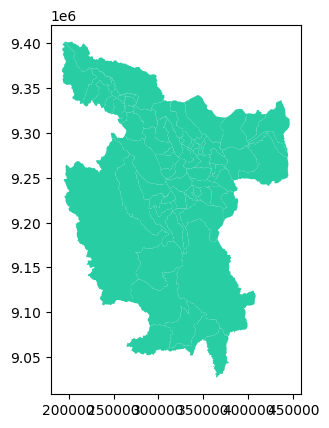

In [55]:
DEPARTAMENTO.plot(color="#29cda4")
plt.show()

In [56]:
DEPARTAMENTO.crs.name

'WGS 84 / UTM zone 18S'

In [57]:
DEPARTAMENTO.head(3)

,OBJECTID_1,OBJECTID,IDDIST,IDDPTO,IDPROV,NOMBDIST,NOMBPROV,NOMBDEP,DCTO,LEY,FECHA,NOM_CAP,SHAPE_LENG,SHAPE_LE_1,SHAPE_AR_1,AREA_MINAM,ha,Shape_Le_2,Shape_Area,geometry
378,379,1676,220807,22,2208,SAN FERNANDO,RIOJA,SAN MARTIN,LEY,24040,26/12/1984,SAN FERNANDO,0.609015,0.604604,0.005644,6917.11,6917.108102,66929.253385,6.917108e+07,"POLYGON ((252267.785 9348757.251, 252079.835 9..."
385,386,1683,220802,22,2208,AWAJUN,RIOJA,SAN MARTIN,LEY,24040,26/12/1984,BAJO NARANJILLO,1.672111,1.669621,0.041349,50689.00,50688.995356,184846.646224,5.068900e+08,"POLYGON ((246878.735 9361006.208, 246722.785 9..."
573,574,1442,220708,22,2207,SHAMBOYACU,PICOTA,SAN MARTIN,LEY,15407,29/01/1965,SHAMBOYACU,0.849185,0.870556,0.032121,39229.89,39229.887301,96214.636794,3.922989e+08,"POLYGON ((383975.808 9233612.947, 383882.197 9..."


In [58]:
name_colm = list(DEPARTAMENTO.columns)

In [59]:
print(name_colm)

['OBJECTID_1', 'OBJECTID', 'IDDIST', 'IDDPTO', 'IDPROV', 'NOMBDIST', 'NOMBPROV', 'NOMBDEP', 'DCTO', 'LEY', 'FECHA', 'NOM_CAP', 'SHAPE_LENG', 'SHAPE_LE_1', 'SHAPE_AR_1', 'AREA_MINAM', 'ha', 'Shape_Le_2', 'Shape_Area', 'geometry']


In [60]:
name_colm.remove("NOMBDIST")
name_colm.remove("NOMBPROV")
name_colm.remove("NOMBDEP")
name_colm.remove("geometry")

In [61]:
DEPARTAMENTO_pop = DEPARTAMENTO.drop(labels = name_colm, axis = 1)
DEPARTAMENTO_pop.head(3)

,NOMBDIST,NOMBPROV,NOMBDEP,geometry
378,SAN FERNANDO,RIOJA,SAN MARTIN,"POLYGON ((252267.785 9348757.251, 252079.835 9..."
385,AWAJUN,RIOJA,SAN MARTIN,"POLYGON ((246878.735 9361006.208, 246722.785 9..."
573,SHAMBOYACU,PICOTA,SAN MARTIN,"POLYGON ((383975.808 9233612.947, 383882.197 9..."


In [62]:
DEPARTAMENTO_pop['centroid'] = DEPARTAMENTO_pop['geometry'].centroid

In [63]:
DEPARTAMENTO_pop.columns

Index(['NOMBDIST', 'NOMBPROV', 'NOMBDEP', 'geometry', 'centroid'], dtype='object')

In [64]:
%matplotlib inline

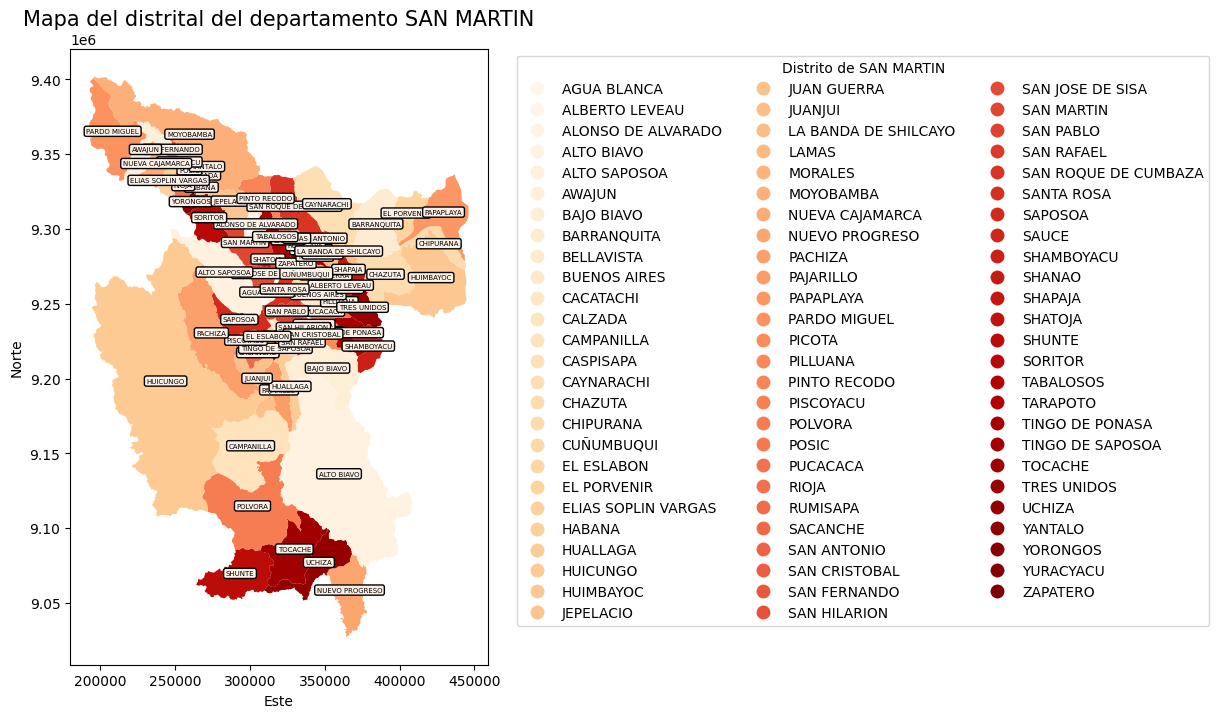

In [68]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, figsize=(22, 8))

DEPARTAMENTO_pop.plot(column='NOMBDIST',
                cmap='OrRd', #'plasma Reds' 'OrRd'
                k=20,
                legend=True,
                legend_kwds={  # propiedades de la cajita de la leyenda
                    'title': 'Distrito de ' + name,
                    'bbox_to_anchor':(1.9,1),
                    'loc': 'upper center', # upper center, center left, center
                    'ncols':3
                }, ax=ax)

props = dict(boxstyle='round', facecolor='linen', alpha=1)

for point in DEPARTAMENTO_pop.iterrows():
    ax.text(point[1]['centroid'].x,
            point[1]['centroid'].y,
            point[1]['NOMBDIST'],
            horizontalalignment='center',
            fontsize=5,
            bbox=props)

ax.axis('on')
plt.title('Mapa del distrital del departamento ' +  name, fontdict={'fontsize': '15'})
plt.xlabel('Este')
plt.ylabel('Norte')
# Guardamos el mapa:
outfp = "mapa_categorizado_" + name + ".png"
plt.savefig(outfp, dpi=500)
plt.show()